In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
import torch as tc
import torch.nn.functional as F
from scipy import signal

def mse(x1, x2): #zdefiniowanie funkcji do liczenia błędu średnio-kwadratowgo
    return np.mean(np.sqrt((x1 - x2)**2))

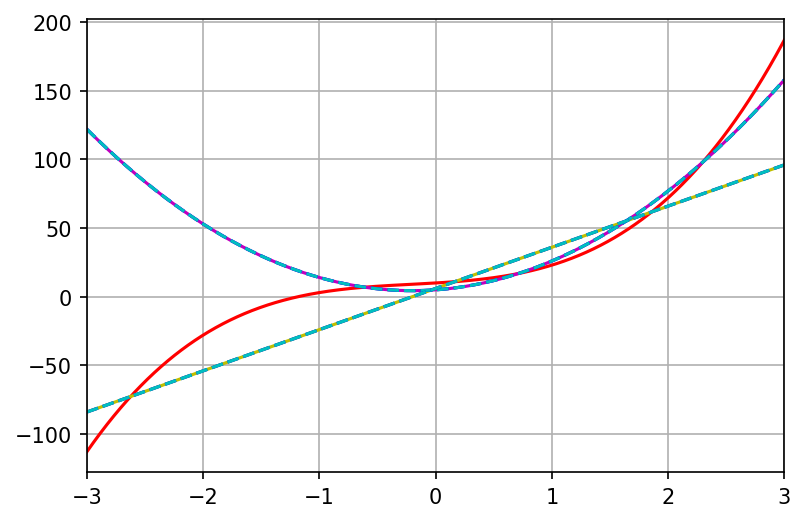

MSE function for real/our_sequential:  0.015062964405134941
MSE function for real/our_convolve:  0.015062964405134941
MSE function for scipy_covlove/our_convolve:  0.0 

Elapsed time our_seq:  0.0070056915
Elapsed time our_conv:  0.0210189819
Elapsed time gradient:  0.0000000000
Elapsed time scipy_conv:  0.0000000000


In [15]:
#ZADANIE 3
#Zaimplementuj funkcje (za pomocą pętli for, bez użycia gotowych funkcji) do obliczenia pochodnej funkcji 
#jednej zmiennej "centralnie", która umożliwia wybór rzędu pochodnej (1, 2, 3, 4) oraz trybu (splot lub sekwencyjnie). 
#Porównaj wynik z wartościami analitycznymi na przykładowym wielomianie wyższego stopnia. 
#Przeanalizuj błędy numeryczne (m.in. porównaj obliczenia zapomocą splotu z sekwencyjnym obliczaniem pierwszej pochodnej).
#Porównaj czas wykonywania obliczeń. Skąd się biorą różnice? Które rozwiązanie jest szybsze? 
#Które rozwiązanie jest bardziej stabilne? Które rozwiązanie jest obarczone mniejszym błędem?

step = 0.001
start = -3
stop = 3
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples) #wygenerowanie zakresu zmiennej x 
y = 5*x**3 + 3*x**2 + 5*x + 10 #zdefiniowanie funkcji y
#y = 5*x**2 + 3*x + 2

def our_derivative(func, step, order, mode): #zdefiniowanie funkcji do liczenia pochodnej
    
    ar = np.array([-1,0,1]) #tablica wykorzystywana przy liczeniu metodą splotu
     
    if mode=="seq": #Liczenie pochodnej sekwencjonalnie 
        
        df = np.zeros(len(func)) #tablica zer, która zostanie wypełniona wartościami pochodnej 
            
        for i in range(1,len(x)-1): #pętla do liczenia wartości pochodnej dla kolejnych elementów
            df[i]=(func[i+1] - func[i-1])/(2*step) #algorytm liczenia wartości pochodnej centralnie 
            
        df[0] = (func[1] - func[0])/step #przypisanie wartości punktowi początkowemu
        df[-1] = (func[-1] - func[-2])/step #przypisanie wartości punktowi końcowemu
    
    if mode=="conv": #Liczenie pochodnej ze splotu
        
        df = np.zeros(len(func)) #tablica zer, która zostanie wypełniona wartościami pochodnej 
            
        for i in range(2): #pętla do dodania zer do tablicy wartosci funkcji (zmiana rozmiaru na 604)
            func = np.insert(func,i,0) #dodanie zer na początek tablicy
            func = np.insert(func,int(len(func)-i),0) #dodanie zer na koniec tablicy
            
        conv = np.zeros(len(func)-2) #utworzenie tablicy którą wypełnimy wartościami splotu
        
        a = 0 #wartość kolejnych elementów w tablicy conv
        for i in range(len(func)-2): #pętla do zapelnienia tablicy konwolucji
            for j in range(3): #pętla do liczenia kolejnych wartosci a
                a += func[i+j]*ar[j] # algorytm liczenia wartości a 
            conv[i] = a #przypisanie wartości a kolejnym elementom w tablicy conv
            a = 0 #wyzerowaie a
 
        conv = conv[1:-1] #zmiana wielkosci tablicy conv na rozmiar tablicy func przed dodaniem zer (czyli 600)

        df = conv/(2*step) #zmiana splotu na tablicę wartości pochodnej
        
    if order==1: 
        return df #zwrócenie funkcji jeżeli order = 1
    else:
        return our_derivative (df, step, order-1, mode) #powtórzenie wykonania funkcji do momentu otrzymania order = 1
    
    
dy_real = 15*x**2 + 6*x + 5 #pierwsza idealna pochodna funkcji y
ddy_real = 30*x + 6 #druga idealna pochodna funkcji y


dy_numerical_seq = our_derivative(y, step, 1, "seq" ) #obliczenie numerycznej pochodnej 1 rzędu funkcji y sekwencjonalnie
dy_numerical_conv = our_derivative(y, step, 1, "conv" ) #obliczenie numerycznej pochodnej 1 rzędu funkcji y splotem


ddy_numerical_seq = our_derivative(y, step, 2, "seq" ) #obliczenie numerycznej pochodnej 2 rzędu funkcji y sekwencjonalnie
ddy_numerical_conv = our_derivative(y, step, 2, "conv" ) #obliczenie numerycznej pochodnej 2 rzędu funkcji y splotem

plt.figure(dpi=150) #przedstawienie wykresów 
plt.plot(x, y, "r") #wykres funkcji y
plt.plot(x, dy_real, "m") #wykres pierwszej pochodnej idealnej funkcji y
plt.plot(x, ddy_real, "y") #wykres drugiej pochodnej idealnej funkcji y
plt.plot(x[1:-1], dy_numerical_seq[1:-1], "b--") #wykres pierwszej pochodnej numerycznej funkcji y sekwencjonalnie
plt.plot(x[1:-1], dy_numerical_conv[1:-1], "c--") #wykres pierwszej pochodnej numerycznej funkcji y splotem
plt.plot(x[2:-2], ddy_numerical_seq[2:-2], "b--") #wykres drugiej pochodnej numerycznej funkcji y sekwencjonalnie
plt.plot(x[2:-2], ddy_numerical_conv[2:-2], "c--") #wykres drugiej pochodnej numerycznej funkcji y splotem
plt.grid(True)
plt.xlim(start, stop)
plt.show()

#przy rysowaniu wykresów pominęto wartości brzegowe

error = mse(ddy_real[2:-2], ddy_numerical_seq[2:-2]) #obliczenie błedu naszej funkcji sekwencjonalnej dla pochodnej 2 
print("MSE function for real/our_sequential: ", error)

error = mse(ddy_real[2:-2], ddy_numerical_conv[2:-2]) #obliczenie błedu naszej funkcji z spoltu dla pochodnej 2 
print("MSE function for real/our_convolve: ", error)

dy_conv = signal.convolve(y, np.array([1, 0, -1]), mode="same") / (2*step) #funcja scipy do pochodnej ze splotu

error = mse(dy_conv, dy_numerical_conv) #obliczenie błedu naszej funkcji splotu dla pochodnej 1 z funckja scipy
print("MSE function for scipy_covlove/our_convolve: ", error, "\n")


b_t = time.time()
ddy_numerical_seq = our_derivative(y, step, 2, "seq" ) #czas na policzenie 2 pochodnej nasza funkcją seq
e_t = time.time()
print("Elapsed time our_seq: ","%.10f" % float(e_t - b_t))

b_t = time.time()
ddy_numerical_conv = our_derivative(y, step, 2, "conv" ) #czas na policzenie 2 pochodnej nasza funkcją conv
e_t = time.time()
print("Elapsed time our_conv: ","%.10f" % float(e_t - b_t))


b_t = time.time()
dy_numerical = np.gradient(y, step)
ddy_numerical = np.gradient(dy_numerical, step)  #czas na policzenie 2 pochodnej funkcją gradient
e_t = time.time()
print("Elapsed time gradient: ","%.10f" % float(e_t - b_t))

b_t = time.time()
ddy_numerical_conv = signal.convolve(y, np.array([1, -2, 1]), mode='same') / (step**2) #czas na policzenie 2 pochodnej scipy
e_t = time.time()
print("Elapsed time scipy_conv: ", "%.10f" % float(e_t - b_t))